In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML
import seaborn as sns

In [61]:
df = pd.read_csv("Github.csv")

In [62]:
df.head(6)

,Name,Stars,Forks,Language,Description,URL,Domain,Growth Pattern
0,freeCodeCamp/freeCodeCamp,224136,8997,JavaScript,The https://freeCodeCamp.com open source codeb...,https://github.com/freeCodeCamp/freeCodeCamp,Documentation,NaN
1,twbs/bootstrap,105991,48185,JavaScript,"The most popular HTML, CSS, and JavaScript fra...",https://github.com/twbs/bootstrap,Web libraries and frameworks,NaN
2,d3/d3,59462,15847,JavaScript,"Bring data to life with SVG, Canvas and HTML. ...",https://github.com/d3/d3,Web libraries and frameworks,NaN
3,facebook/react,58176,10559,JavaScript,"A declarative, efficient, and flexible JavaScr...",https://github.com/facebook/react,Web libraries and frameworks,NaN
4,angular/angular.js,54439,27059,JavaScript,HTML enhanced for web apps,https://github.com/angular/angular.js,Web libraries and frameworks,NaN
5,getify/You-Dont-Know-JS,49828,7657,JavaScript,A book series on JavaScript. @YDKJS on twitter.,https://github.com/getify/You-Dont-Know-JS,Documentation,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            5000 non-null   object
 1   Stars           5000 non-null   int64 
 2   Forks           5000 non-null   int64 
 3   Language        5000 non-null   object
 4   Description     4958 non-null   object
 5   URL             5000 non-null   object
 6   Domain          5000 non-null   object
 7   Growth Pattern  3863 non-null   object
dtypes: int64(2), object(6)
memory usage: 312.6+ KB


### Data Pre-Processing, EDA, Cleanup

#### Delete the growth pattern as it is not relevant to this project. We shall explore growth patterns later on with more rigorous approach.

In [64]:
df.drop('Growth Pattern', axis=1, inplace=True)

In [65]:
df

,Name,Stars,Forks,Language,Description,URL,Domain
0,freeCodeCamp/freeCodeCamp,224136,8997,JavaScript,The https://freeCodeCamp.com open source codeb...,https://github.com/freeCodeCamp/freeCodeCamp,Documentation
1,twbs/bootstrap,105991,48185,JavaScript,"The most popular HTML, CSS, and JavaScript fra...",https://github.com/twbs/bootstrap,Web libraries and frameworks
2,d3/d3,59462,15847,JavaScript,"Bring data to life with SVG, Canvas and HTML. ...",https://github.com/d3/d3,Web libraries and frameworks
3,facebook/react,58176,10559,JavaScript,"A declarative, efficient, and flexible JavaScr...",https://github.com/facebook/react,Web libraries and frameworks
4,angular/angular.js,54439,27059,JavaScript,HTML enhanced for web apps,https://github.com/angular/angular.js,Web libraries and frameworks
...,...,...,...,...,...,...,...
4995,Yalantis/FlipViewPager.Draco,1598,326,Java,This project aims to provide a working page fl...,https://github.com/Yalantis/FlipViewPager.Draco,Non-web libraries and frameworks
4996,ScottHamper/Cookies,1598,167,JavaScript,JavaScript Client-Side Cookie Manipulation Lib...,https://github.com/ScottHamper/Cookies,Web libraries and frameworks
4997,mortdeus/legacy-cc,1597,199,C,The earliest versions of the very first c comp...,https://github.com/mortdeus/legacy-cc,Software tools
4998,B-Sides/ELCImagePickerController,1597,496,Objective-C,A clone of the UIImagePickerController using t...,https://github.com/B-Sides/ELCImagePickerContr...,Non-web libraries and frameworks


In [66]:
df.isnull().sum()

Name            0
Stars           0
Forks           0
Language        0
Description    42
URL             0
Domain          0
dtype: int64

### Data Visualization 

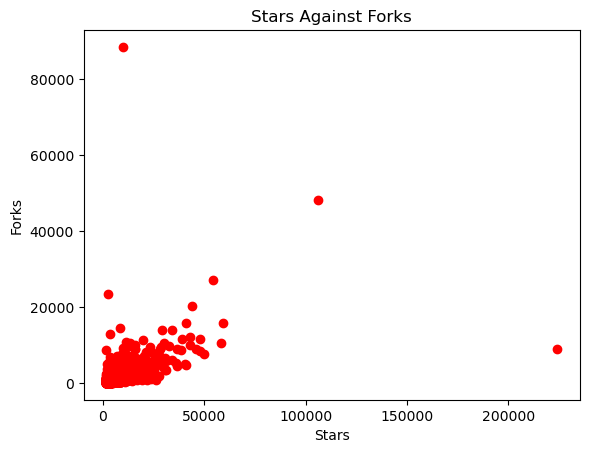

In [67]:
# create scatterplot of variables mpg against wt.
plt.plot(df["Stars"], df["Forks"], 'o', color='red')

# set a title for the plot, x-axis, and y-axis.
plt.title('Stars Against Forks')
plt.xlabel('Stars')
plt.ylabel('Forks')

# show the plot.
plt.show()

#### Insight:
* As the stars increase, so too does the forks.
* Three outlier of the data all belong to JavaScript langauge.
* Outliers belong to Web Libraires and Framework.

In [68]:
columns = df.columns
categorical_cols = []
numerical_cols = []
for col in columns:
    if df[col].dtype == "object":
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [69]:
categorical_cols

['Name', 'Language', 'Description', 'URL', 'Domain']

In [70]:
numerical_cols

['Stars', 'Forks']

In [77]:
df.groupby('Language').mean().round()

,Stars,Forks
Language,,
ActionScript,2063.0,875.0
ApacheConf,4891.0,595.0
Assembly,6759.0,995.0
Batchfile,6412.0,1922.0
Bro,1732.0,460.0
...,...,...
TypeScript,5981.0,1153.0
Vala,4197.0,208.0
VimL,4633.0,685.0


In [78]:
df.groupby('Domain').mean().round()

,Stars,Forks
Domain,,
Application software,4398.0,917.0
Documentation,5038.0,1393.0
Non-web libraries and frameworks,3603.0,715.0
Software tools,4163.0,673.0
System software,5480.0,1159.0
Web libraries and frameworks,4773.0,907.0


In [80]:
df.groupby('Name').mean().round()

,Stars,Forks
Name,,
01org/acat,2536.0,583.0
01org/appframework,2505.0,997.0
0rpc/zerorpc-python,1850.0,238.0
0x5e/wechat-deleted-friends,4635.0,1694.0
0xced/XCDYouTubeKit,1959.0,325.0
...,...,...
zyedidia/micro,4736.0,185.0
zythum/mama2,1838.0,282.0
zzmp/juliusjs,2461.0,164.0


### Insights:
* There 71 different langauges that were grouped in the two numerical value category

In [72]:
df['Language'].head(15)

0     JavaScript
1     JavaScript
2     JavaScript
3     JavaScript
4     JavaScript
5     JavaScript
6          Shell
7           HTML
8     JavaScript
9            C++
10    JavaScript
11    JavaScript
12             C
13           C++
14    JavaScript
Name: Language, dtype: object

In [73]:
df['Name'].head(15)

0     freeCodeCamp/freeCodeCamp
1                twbs/bootstrap
2                         d3/d3
3                facebook/react
4            angular/angular.js
5       getify/You-Dont-Know-JS
6        robbyrussell/oh-my-zsh
7      FortAwesome/Font-Awesome
8             airbnb/javascript
9         tensorflow/tensorflow
10        facebook/react-native
11                jquery/jquery
12               torvalds/linux
13            electron/electron
14                    vuejs/vue
Name: Name, dtype: object

### Model Training

In [96]:
X = df['Stars']
y = df['Forks']

In [97]:
# Let's now take a look a# Import train test split package to test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train.head()

4966    1610
4086    1936
2881    2563
1237    4571
1429    4180
Name: Stars, dtype: int64

In [98]:
import statsmodels.api as sm

In [99]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [100]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Forks   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     5215.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:02:15   Log-Likelihood:                -29103.
No. Observations:                3500   AIC:                         5.821e+04
Df Residuals:                    3498   BIC:                         5.822e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -253.0653     22.616    -11.190      0.0

In [101]:
# Model evaluation to check the error terms
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

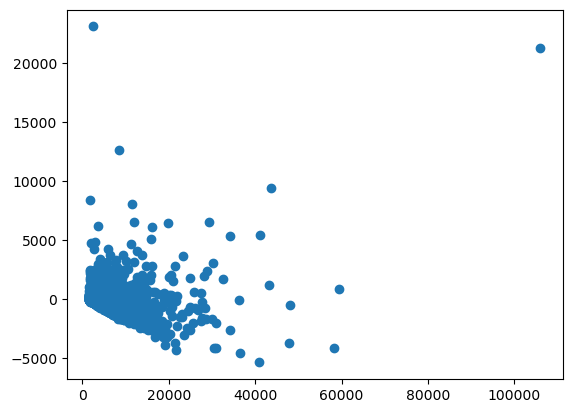

In [92]:
plt.scatter(X_train,res)
plt.show()